# Exploration of Projection Spaces

In [1]:
# Disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


In [2]:
# Some functions

# Function for encoding of our data
def one_hot_encoding(game_states):
    
    p_values = [1, -1, 0]   # Possible values: 1 (black), -1 (white), 0 (empty)
    
    # Prepare an empty array for the encoded data
    game_states_encoded = np.zeros(shape=(game_states.shape[0], game_states.shape[1] * 3) ,dtype=bool)
    
    # Loop over game states:
    for i, state in enumerate(game_states):
        c = 3
        # Loop over positions:
        for position in state:
            game_states_encoded[i, c-3:c] = [1 if position == p_value else 0 for p_value in p_values]
            c += 3
    
    return game_states_encoded

# Function for ploting multiple projection methods
def plot_multiple_proj_methods(projections, data, methods=None, figsize=(24,46), n_rows=5, n_cols=2,
                               scatter_only=False, start_ends=False, start_ends_masks=None):
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)

    if methods is None:
        methods = list(projections.keys())

    i = 0
    for row in range(n_rows):
        for col in range(n_cols):
            
            if scatter_only:
                ax[row,col].scatter(x=projections[methods[i]][:, 0], y=projections[methods[i]][:, 1], alpha=0.5)
                ax[row,col].set_title(methods[i])
                ax[row,col].set_xlabel("y1")
                ax[row,col].set_ylabel("y2")
            else:
                for game_id in np.unique(data[:, 0]):
                    mask = game_id == data[:, 0]

                    # Connectors
                    ax[row,col].plot(projections[methods[i]][mask][:, 0], projections[methods[i]][mask][:, 1],
                                     alpha=0.6)
                    # Dots
                    ax[row,col].scatter(x=projections[methods[i]][mask][:, 0], y=projections[methods[i]][mask][:, 1],
                                        alpha=0.9)

                    ax[row,col].set_title(methods[i])
                    ax[row,col].set_xlabel("y1")
                    ax[row,col].set_ylabel("y2")
    
            if start_ends:
                # Start state
                ax[row,col].scatter(x=projections[methods[i]][start_ends_masks[0]][:, 0], y=projections[methods[i]][start_ends_masks[0]][:, 1],
                        s=100 ,alpha=1, marker="s", c="black")

                # End state - black win
                ax[row,col].scatter(x=projections[methods[i]][start_ends_masks[1]][:, 0], y=projections[methods[i]][start_ends_masks[1]][:, 1],
                        s=100 ,alpha=1, marker="^", c="black")

                # End state - white win
                ax[row,col].scatter(x=projections[methods[i]][start_ends_masks[2]][:, 0], y=projections[methods[i]][start_ends_masks[2]][:, 1],
                        s=100 ,alpha=1, marker="v", c="black")

                # End state - draw
                ax[row,col].scatter(x=projections[methods[i]][start_ends_masks[3]][:, 0], y=projections[methods[i]][start_ends_masks[3]][:, 1],
                        s=100 ,alpha=1, marker=">", c="black")
                
                
                # Show the legend
                square = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                               markersize=7, label='Start State')

                up_tri = mlines.Line2D([], [], color='black', marker='^', linestyle='None',
                                       markersize=7, label='Blacks Win')

                down_tri = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                                       markersize=7, label='Whites Win')

                right_tri = mlines.Line2D([], [], color='black', marker='>', linestyle='None',
                                       markersize=7, label='Draw')

                ax[row,col].legend(handles=[square, up_tri, down_tri, right_tri])


            i += 1

    plt.show()
    
    
# Function for ploting single projection method
def plot_single_proj_method(projections, data, method, figsize=(16,10), start_ends_masks=None):
    
    fig, ax = plt.subplots(figsize=figsize)

    for game_id in np.unique(data[:, 0]):
        mask = game_id == data[:, 0]

        # Connectors
        ax.plot(projections[method][mask][:, 0], projections[method][mask][:, 1], alpha=0.6)
        # In between
        ax.scatter(x=projections[method][mask][:, 0], y=projections[method][mask][:, 1], alpha=0.9)

    ax.set_title(method)
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")

    # Start state
    ax.scatter(x=projections[method][start_ends_masks[0]][:, 0], y=projections[method][start_ends_masks[0]][:, 1],
            s=100 ,alpha=1, marker="s", c="black")

    # End state - black win
    ax.scatter(x=projections[method][start_ends_masks[1]][:, 0], y=projections[method][start_ends_masks[1]][:, 1],
            s=100 ,alpha=1, marker="^", c="black")

    # End state - white win
    ax.scatter(x=projections[method][start_ends_masks[2]][:, 0], y=projections[method][start_ends_masks[2]][:, 1],
            s=100 ,alpha=1, marker="v", c="black")

    # End state - draw
    ax.scatter(x=projections[method][start_ends_masks[3]][:, 0], y=projections[method][start_ends_masks[3]][:, 1],
            s=100 ,alpha=1, marker=">", c="black")


    
    square = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                           markersize=7, label='Start State')
    
    up_tri = mlines.Line2D([], [], color='black', marker='^', linestyle='None',
                           markersize=7, label='Blacks Win')
    
    down_tri = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                           markersize=7, label='Whites Win')
    
    right_tri = mlines.Line2D([], [], color='black', marker='>', linestyle='None',
                           markersize=7, label='Draw')
    
    plt.legend(handles=[square, up_tri, down_tri, right_tri])
    plt.show()


# Function for ploting winners and losers
def plot_single_proj_method_w_l(projections, data, method, figsize=(16,10), wins_masks=None,
                                end_colors=None, start_ends_masks=None):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for game_id in np.unique(data[:, 0][wins_masks[0]]):
        mask = game_id == data[:, 0]

        # Connectors
        ax.plot(projections[method][mask][:, 0], projections[method][mask][:, 1], alpha=0.6, c="goldenrod")
        # In between
        ax.scatter(x=projections[method][mask][:, 0], y=projections[method][mask][:, 1], alpha=0.9, c="goldenrod")
    

    for game_id in np.unique(data[:, 0][wins_masks[1] | wins_masks[2]]):
        mask = game_id == data[:, 0]

        # Connectors
        ax.plot(projections[method][mask][:, 0], projections[method][mask][:, 1], alpha=0.3, c="grey")
        # In between
        ax.scatter(x=projections[method][mask][:, 0], y=projections[method][mask][:, 1], alpha=0.6, c="grey")

    ax.set_title(method)
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")

    # Start state
    ax.scatter(x=projections[method][start_ends_masks[0]][:, 0], y=projections[method][start_ends_masks[0]][:, 1],
            s=100 ,alpha=1, marker="s", c="black")

    # End state - black win
    ax.scatter(x=projections[method][start_ends_masks[1]][:, 0], y=projections[method][start_ends_masks[1]][:, 1],
            s=100 ,alpha=1, marker="^", c=end_colors[0])

    # End state - white win
    ax.scatter(x=projections[method][start_ends_masks[2]][:, 0], y=projections[method][start_ends_masks[2]][:, 1],
            s=100 ,alpha=1, marker="v", c=end_colors[1])

    # End state - draw
    ax.scatter(x=projections[method][start_ends_masks[3]][:, 0], y=projections[method][start_ends_masks[3]][:, 1],
            s=100 ,alpha=1, marker=">", c=end_colors[2])
    
    square = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                           markersize=7, label='Start State')

    up_tri = mlines.Line2D([], [], color=end_colors[0], marker='^', linestyle='None',
                           markersize=7, label='Blacks Win')

    down_tri = mlines.Line2D([], [], color=end_colors[1], marker='v', linestyle='None',
                           markersize=7, label='Whites Win')

    right_tri = mlines.Line2D([], [], color=end_colors[2], marker='>', linestyle='None',
                           markersize=7, label='Draw')

    plt.legend(handles=[square, up_tri, down_tri, right_tri])


    plt.show()



# Funciton to show state of the board
def plot_single_proj_method_share(projections, data, method, shares, figsize=(16,10)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    
    sc = plt.scatter(x=projections[method][:, 0], y=projections[method][:, 1],
                     alpha=1, c=share_blacks, cmap="YlOrBr", vmin=0, vmax=1)

    ax.set_title(method)
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    
    cbar = plt.colorbar(sc)
    cbar.set_label('Share of black figures on the board', rotation=270)
    
    plt.show()



## Data

### Read and Prepare Data
Read in your data from a file or create your own data.

Document any data processing steps.

In [3]:
n_samples = 10


from create_game_states import main as generate_states

"""
# Use only when the data has not yet been generated
# Generate game states from the raw input data
generate_states(input_path="data/othello_dataset.csv",
                output_path=f"data/othello_dataset_preprocessed_{n_samples}",
                random_sampling=True, n_samples=n_samples, seed=66)
"""


# Load up the data
data = np.load(f"data/othello_dataset_preprocessed_{n_samples}.pkl", allow_pickle=True)

# Get only the game states and encode it
game_states = data[:, 3:]
game_states_encoded = one_hot_encoding(game_states)

### Comments
- Did you transform, clean, or extend the data?  How/Why?
    
    We wrote a Python script which takes in a sequence of steps and records the game states by simulating each game. Each state is represented by a flattened 8x8 numpy array. We combine the data with additional information such as id of a game, winner of a game and order number of a state. A typical game takes 60 moves to finish. 

    The original dataset contains 25 658 games. We take only a small subset of these games for the sake of readability of the charts. Because of that we can clearly see the results and the dependencies in plots for various games. 

    To be able to down-project the states, we do a one hot encoding. 

## Projection
Project your data into a 2D space.
Try multiple (3+) projection methods (e.g., t-SNE, UMAP, MDS, PCA, ICA, other methods) with different settings and compare them.

Make sure that all additional dependencies are included when submitting.

In [4]:
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

# Defining the methods
projection_methods = {
    "PCA":
        PCA(n_components=2),
    "FastICA":
        FastICA(n_components=2),
    "LLE (n neighbors: 5)":
        LocallyLinearEmbedding(n_components=2, n_neighbors=5, n_jobs=-1),
    "LLE (n neighbors: 10)":
        LocallyLinearEmbedding(n_components=2, n_neighbors=10, n_jobs=-1),
    "T-SNE (Perplexity: 50)":
        TSNE(n_components=2, perplexity=50, n_jobs=-1),
    "T-SNE (Perplexity: 30)":
        TSNE(n_components=2, perplexity=30, n_jobs=-1),
    "T-SNE (Perplexity: 10)":
        TSNE(n_components=2, perplexity=10, n_jobs=-1),
    "MDS":
       MDS(n_components=2, n_jobs=-1)
}

# Down-projecting the data
projections = {}

for method in projection_methods.keys():
    p_method = projection_methods[method]
    projections[method] = p_method.fit_transform(game_states_encoded)


Visualization of different projection methods:


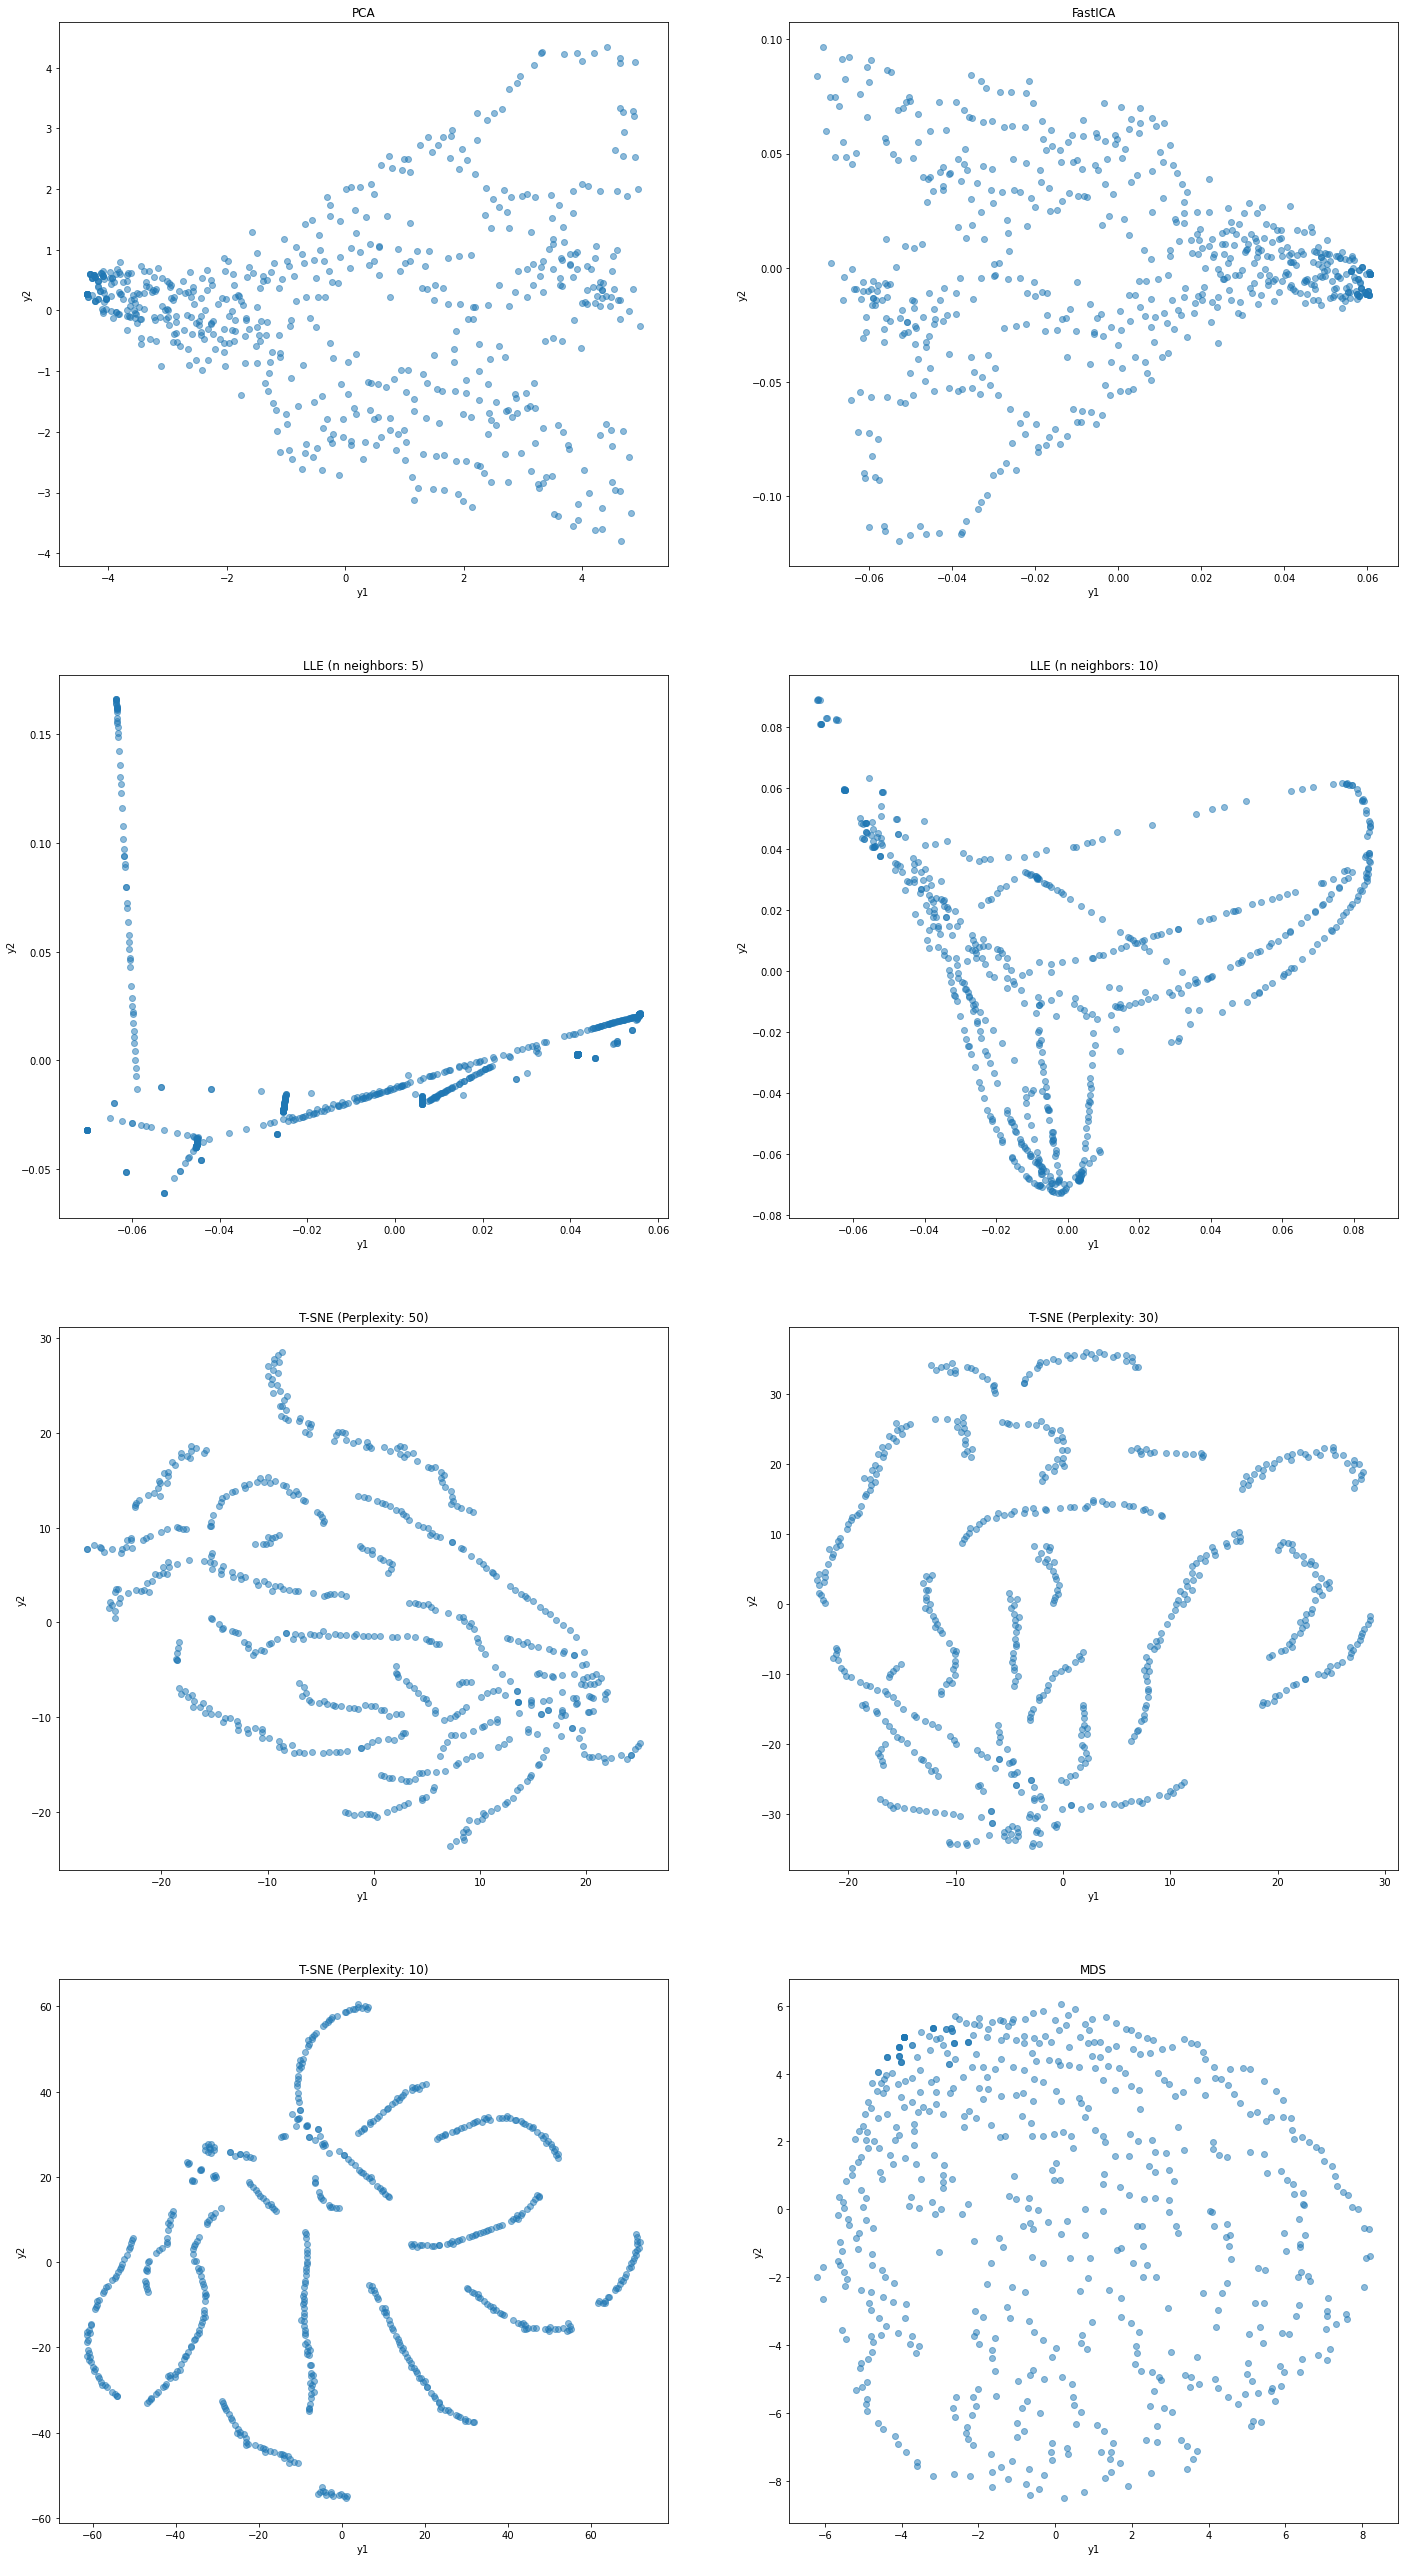

In [5]:
# Visualize the projections
print("Visualization of different projection methods:")
plot_multiple_proj_methods(projections, data, figsize=(24,46), n_rows=4, n_cols=2, scatter_only=True,
                           start_ends=False, start_ends_masks=None)

### Comments
- Which features did you use? Why?

    For projecting the data into a lower dimensional space, we use only the features describing the states themselves (positions on the board).
    <br>

- Which projection methods did you use? Why?

    We used a principal component analysis (PCA), independent components analysis (ICA), locally linear embedding (LLE), t-distributed stochastic neighbor embedding (t-SNE), and multidimensional scaling (MDS).
    
     At first we wanted to try some linear methods, as a result we decided to use the PCA due to its simplicity and iterpretability of its results (data is down-projected base on its variance) and ICA. We did not use the nonlinear kernel PCA because we believe linear PCA would be sufficient due to the nature of our data. However, we still wanted to try some nonlinear methods, that is why we tried the MDS, LLE, and t-SNE because we belive they may be able to capture and retain the similarities between the individual states and thus preserve the neighborhoods found in the higher dimensional space.
    <br>

- Why did you choose these hyperparameters?

    In this part of the assignment, we wanted to figure out which methods and hyperparameters would work best for our data. For LLE, we tried various numbers of neighbors, however, independent of the hyperparameters we used, LLE still did not produce any meaningful results. 

    For t-SNE, we usually set the perplexity between 5 and 50 to influence closeness of a point's neighbors. Without looking at the result, we cannot say which value of perplexity is ideal, that is why we used 3 different perplexity values. 
    <br>

- Are there patterns in the global _and_ the local structure?

    PCA seems to produce promising results, it seems to capture the development of a game through various states. The same applies for ICA because it produces the same result as PCA. Therefore, we can say that the covariance matrix can fully explain the data. MDS results seem to be in some form similar to the ones from PCA, however, we need more information to say that for certain. LLE did not produce anything meaningful. Lastly, t-SNE produced some clusters but, in this section, without more information we cannot judge their quality. To be able to evaluate the methods in more detail, we have to include more information, which we will do in the next steps.
    
    For the next steps, we will just use PCA, t-SNE and MDS.
    
    <br>


### Link States
Connect the states that belong together.

The states of a single solution should be connected to see the path from the start to the end state.
How the points are connected is up to you, for example, with straight lines or splines.

Connecting states from the same game:


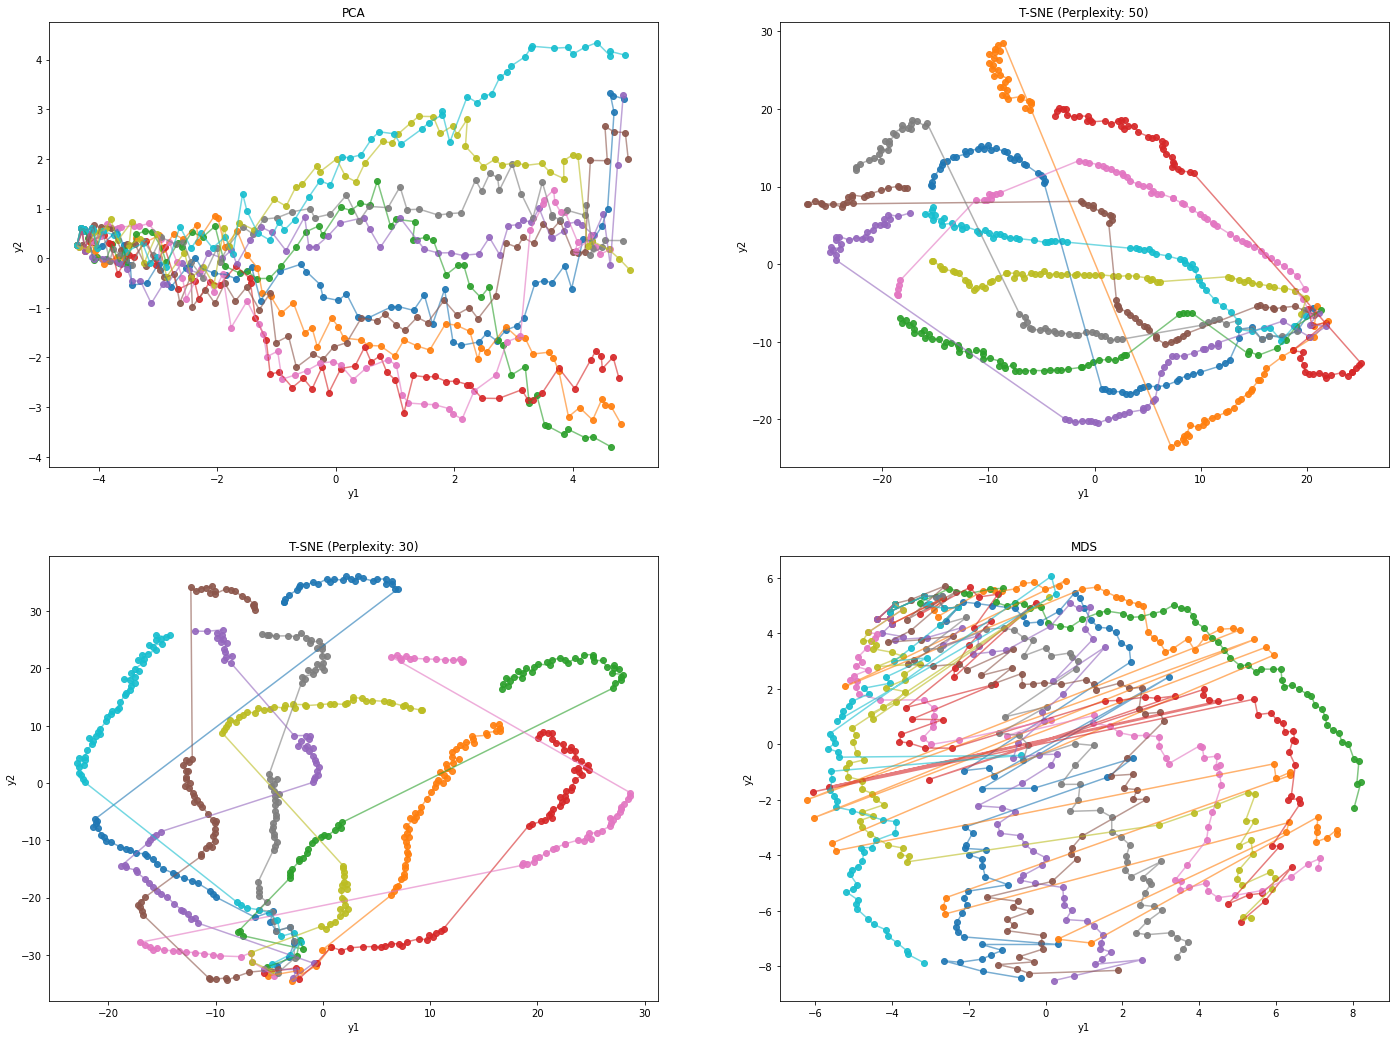

In [6]:
filtered_methods=["PCA", "T-SNE (Perplexity: 50)", "T-SNE (Perplexity: 30)", "MDS"]

print("Connecting states from the same game:")
plot_multiple_proj_methods(projections, data, methods=filtered_methods,
                           figsize=(24,18), n_rows=2, n_cols=2, scatter_only=False,
                           start_ends=False, start_ends_masks=None)


### Meta Data Encoding 
Encode addtional features in the visualization.

Use features of the source data and include them in the projection, e.g., by using color, opacity, different shapes, or line styles, etc.

In [7]:
# Create some filters mask for the data

# Get only the end states (games can have various lenghts)
end_mask = np.zeros(shape=len(data), dtype=bool)
for game_id in np.unique(data[:, 0]):
    mask = game_id == data[:, 0]
    end_mask[mask] = data[mask][:, 2] == np.amax(data[mask][:, 2])
    
# Get only the start states
start_mask = data[:, 2] == 0

# Get only the end states with the information about the winner
end_black_win_mask = end_mask & (data[:, 1] == 1)
end_white_win_mask = end_mask & (data[:, 1] == -1)
end_draw_mask = end_mask & (data[:, 1] == 0)

start_end_masks_list = [start_mask, end_black_win_mask, end_white_win_mask, end_draw_mask]

# Get all game states where blacks wins
black_wins_mask = data[:, 1] == 1

# Get all game states where whites wins
white_wins_mask = data[:, 1] == -1

# Get all game states which ended in a draw
draw_mask = data[:, 1] == 0

# Get the percentage share of black pieces on a board for each state
n_blacks = (data[:, 3:] == 1).sum(axis=1)
n_whites = (data[:, 3:] == -1).sum(axis=1)

share_blacks = n_blacks / (n_whites + n_whites)

# Pick only the methods we want to use
filtered_methods=["PCA", "T-SNE (Perplexity: 50)", "T-SNE (Perplexity: 30)", "MDS"]

##### Which projection is the most informative?

Highlighting start and end state of each game:


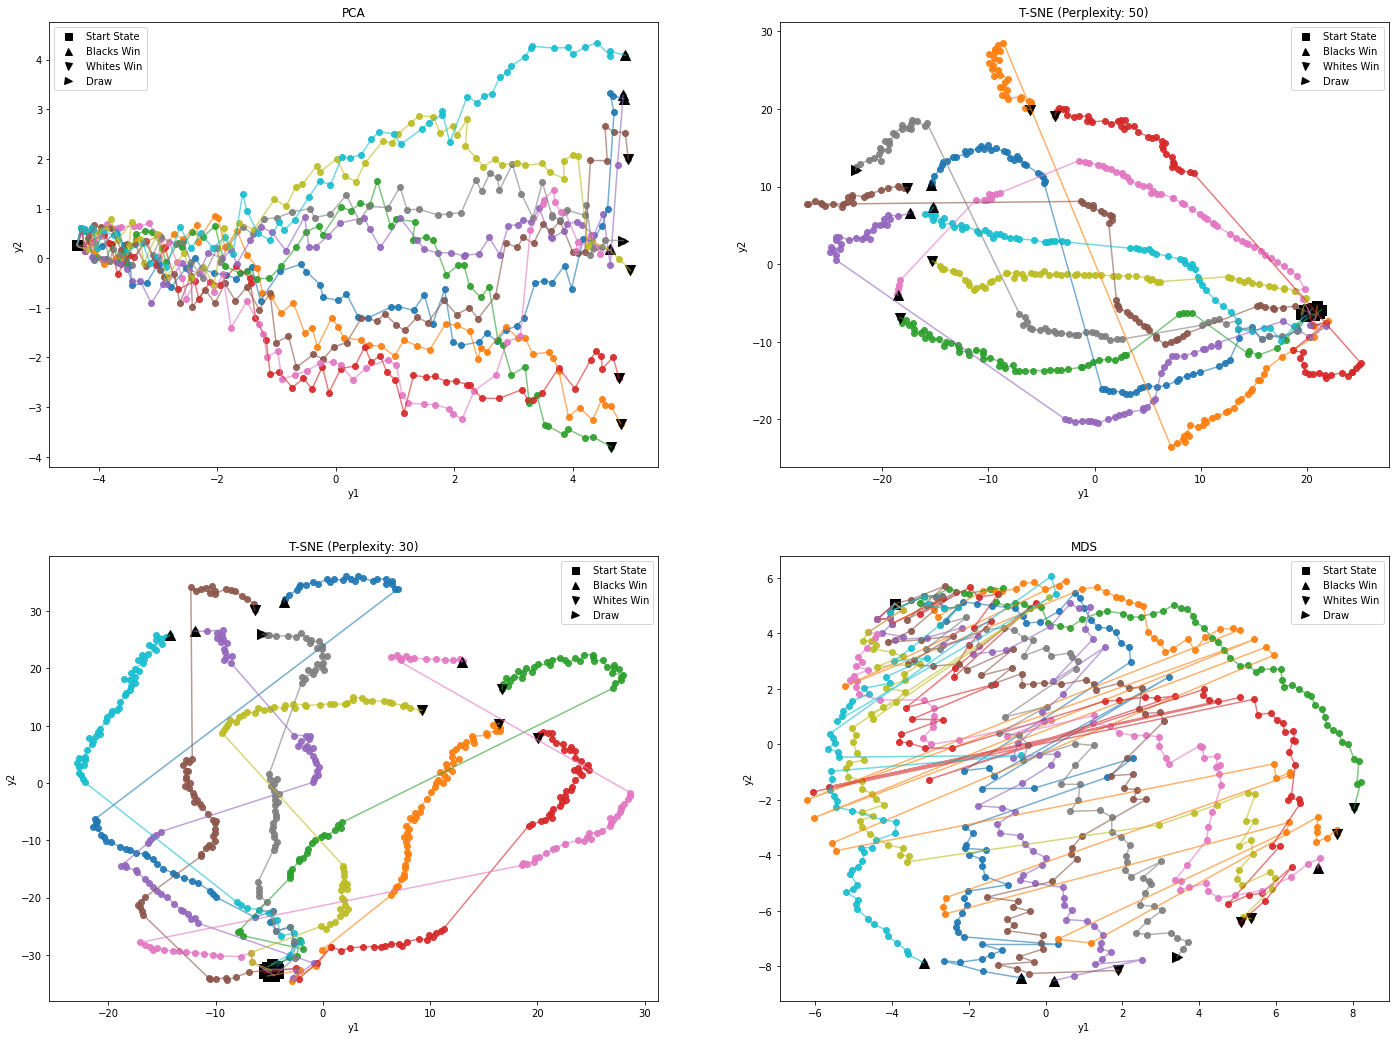

PCA only:


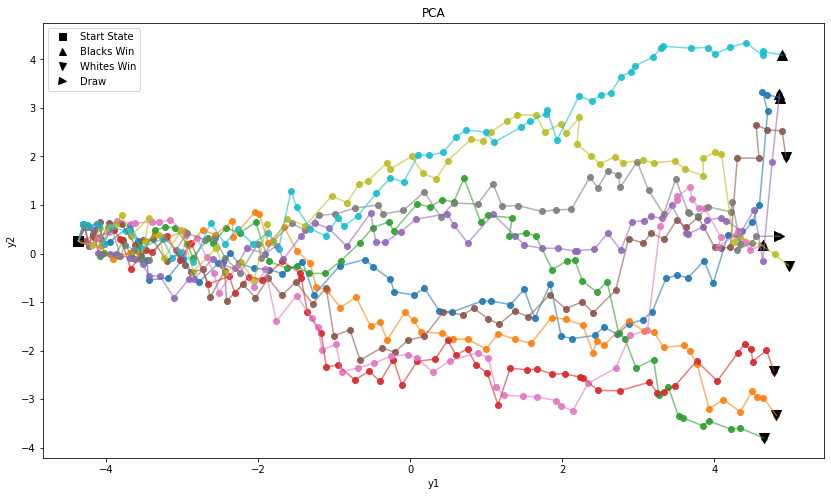

In [8]:
print("Highlighting start and end state of each game:")
plot_multiple_proj_methods(projections, data, methods=filtered_methods,
                           figsize=(24,18), n_rows=2, n_cols=2, scatter_only=False, start_ends=True,
                           start_ends_masks=start_end_masks_list)

print("PCA only:")
plot_single_proj_method(projections, data, method="PCA", figsize=(14,8), start_ends_masks=start_end_masks_list)

Now, the patterns in global and local structure are better visible. Globally, we can see that in the PCA projection the points are in a specific sequence, starting on the left side (can be seed based on the starting point) and ending on the right side, in one of the end game points there. Locally, each projection goes directly from left to right, does not overloop, does not turn back. There are different distances between consecutive points within the one game sequence, what we will try to explain later in this notebook. 

In some cases, MDS produces similar projection as PCA, where we can see clear game "trajectory". However, simply put, some states are "all over the place". That is why we will exclude this projection. T-SNE seems to group states from the same game, however, that is not the information for which we are looking for. Consequently, for further examination, we will use only the PCA projections.

##### Can we see from the projections the state of the board?

Highlighting the share of black figures on a board for each state:


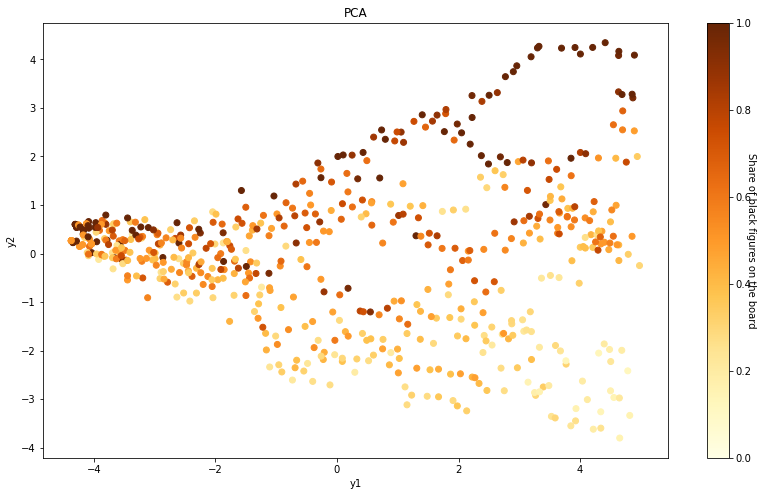

In [9]:
print("Highlighting the share of black figures on a board for each state:")
plot_single_proj_method_share(projections, data, method="PCA", shares=share_blacks, figsize=(14,8))

In the chart, dark values are in the favour of blacks, and bright values in the favour of whites. By examining the chart more closely, we can see that the y2 axis of the PCA projection also captures the number of pieces on the board, positive values on the axis are in the favour of the blacks, negative values are in the favour of the whites. 

##### Are there any strategies? Do the winning games have something in common?

Highlighting games that were won by blacks (gold):


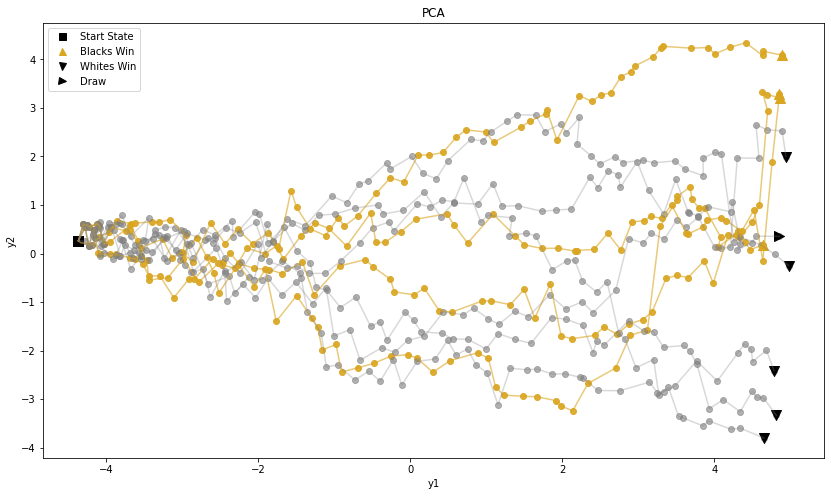


Highlighting games that were won by whites (gold):


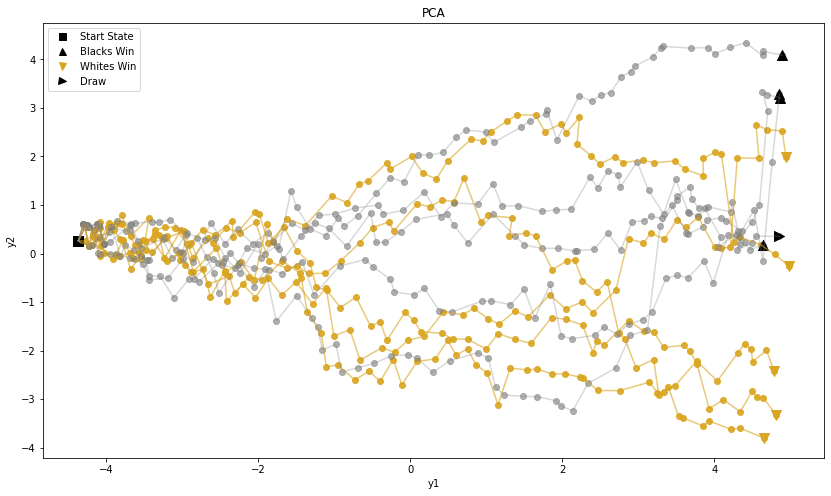

In [10]:
print("Highlighting games that were won by blacks (gold):")
plot_single_proj_method_w_l(projections, data, method="PCA", figsize=(14,8),
                           wins_masks=[black_wins_mask, white_wins_mask, draw_mask],
                           end_colors=["goldenrod", "black", "black"],
                           start_ends_masks=start_end_masks_list)

print("\nHighlighting games that were won by whites (gold):")
plot_single_proj_method_w_l(projections, data, method="PCA", figsize=(14,8),
                           wins_masks=[white_wins_mask, black_wins_mask, draw_mask],
                           end_colors=["black", "goldenrod", "black"],
                           start_ends_masks=start_end_masks_list)

In the later game stages, we can notice significant game state changes. In a few turns, the game balance can drastically change. We assume that good players may carefully plan and place their figures so that they can flip many of the opponent's figures in just one turn and thus deal the final blow, or change the state of the game.

##### In which way are the games that end in a draw different to others?

Highlighting games that ended in draw (gold):


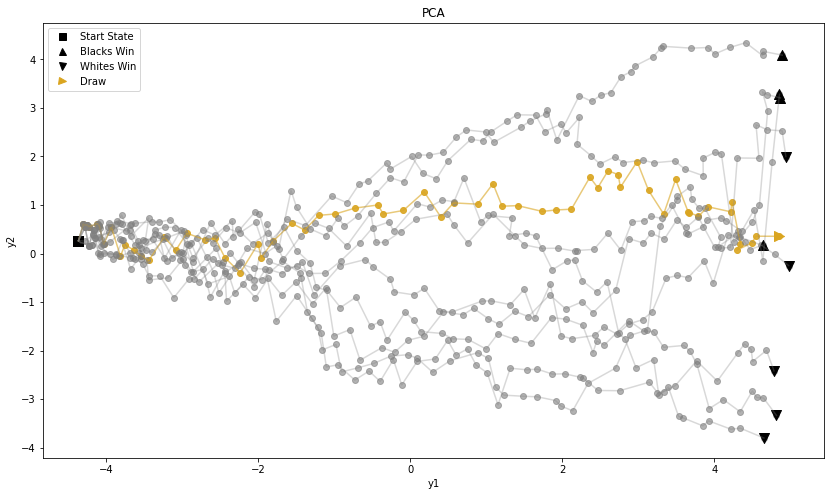

In [11]:
print("Highlighting games that ended in draw (gold):")
plot_single_proj_method_w_l(projections, data, method="PCA", figsize=(14,8),
                            wins_masks=[draw_mask, black_wins_mask, white_wins_mask],
                            end_colors=["black", "black", "goldenrod"],
                            start_ends_masks=start_end_masks_list)


Based on our observations, the games that end in a draw tend not to have large game state changes.

### Comments
- Which features did you use? Why?
    
    This time we used the whole data set, that means: game id, information who was the winner, order number of the state of the game and the states themselves. As mentioned before, we used them to look on the data from the more general perspective, look for similarities in the games.
<br>

- How are the features encoded?
    
    The id of a game is integer from 0 to the number of games in the dataset. The column winner has values: 1 for win for blacks, -1 for whites, 0 for draw. The column containing the order number is an integer between 0 and 60. Furthermore, we calculated the share of black figures on a board for each state. Other columns, with states of the board, are encoded with use of one-hot encoding.


## Results

### Interpretion
- What can be seen in the projection(s)?

    The projection done by PCA showed us how individual games develop over time, state by state. One can clearly see from the visualization how important the end of a game is. Even when using a small sample (note that we tried significantly larger sample size, but for the sake of readability, we decided to use only 10 games for the final report), in some cases, we could see how the game state can rapidly change in favour of one of the players. We believe that experienced players may look many turns ahead to create an ideal state in which they can flip many of the opponent's figures in one turn. Unfortunately, in the projections, this cannot be differentiated from pure luck. 
    <br>
    
- Was it what you expected? If not what did you expect?

    Naively, we expected to see player strategies. The projections worked well, but due to the flow of the game, we could not see any clear strategy.  Maybe, if actions themselves were included in the data, then we would have gotten more relevant results. Nevertheless, the projections gave an interesting overview of the game. 
    <br>
    
- Can you confirm prior hypotheses from the projection?

    No, we can see patters in the very early part of the game, however, when the game develops, the many possibilities, and heavy dependency on the other player make strategies unclear. 
    
    <br>
    
- Did you get any unexpected insights?
    
    We were very surprised how well the PCA projected the data into the lower dimensional space. y2 axis captured the state of the board, y1 axis served as a timeline. This projection might be very interesting when combined with interactive charts. 


## Submission
When you’ve finished working on this assignment please download this notebook as HTML and add it to your repository in addition to the notebook file.